# Cyclistic Bike-Share Analysis Case Stydy [Python]

### Introduction

Cyclistic Bike-Share, a fictional company, that offers different types of bikes to users in Chicago.

The director, Lily Moreno, is responsible for the development of campaigns and innitiatives to promote the bike-share program. Moreno belived that maximizing the number of annual memberships will be key to future growth. Moreno believes there is a solid opportunity to convert casual riders into members. Her goal is to design marketting strategies aimed at converting casual riders into annual members.

In order to do that, however, the team needs to better understand howannual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

I work as a junior data analyst and my team has been tasked with the following questions that will guice the future of the marketting program:

## Ask
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

**Guiding questions and answers**

- What is the problem I am trying to solve?
*Ans* I am trying to solve how cyclistic bike-share can convert Casual riders into annual members because annual members are more profitabe
- How can my insights drive business decisions ?
*Ans* By analyzing the data, I will find key insights and trends that can be beneficial for to draw data-driven decions for the business

**Key tasks**

- Indentify the business task
*Ans* Analyze historical bike trip data to identify trend in how annual members and casual riders use Cyclistic bikes differently
- Consider key stake holders
*Ans* Director, Lily Moreno

**Deliverable**

- A clear statement of the business task

*Ans* To analyze historical bike trip data and identify trends on how annual members and casual riders use Cyclistic bikes differently. This analysis aims to provide insights that can drive data-driven decisions to convert casual riders into annual members, as annual members are more profitable for Cyclistic. The analysis will help Director Lily Moreno and other stakeholders understand the usage patterns of both customer segments and devise strategies to influence casual riders to become members.

## Prepare

**Guiding questions and answers**

- Where is your data located?
- **Ans** Kaggle.com
- How is the data organized?
- **Ans** As a structered dataset with columns describing characteristic of a bike trip (row)
- Are there issues with bias or credibility in this data? Does your data ROCCC?
- **Ans** No, the data is not biased. It was collected by a a bike sharing company but it does lack some some information so I do not think it is comprehensive
- How are you addressing licensing, privacy, security, and accessibility?
- **Ans** The data has been made available under a license
- How did you verify the data’s integrity?
- **Ans** I performed a data clean of the dataset and checked for inconsistencies, etc
- How does it help you answer your question?
- **Ans** It gives me insights about bike trip duration for different months, days and hours by the different bike users
- Are there any problems with the data?
- **Ans** there were alot if NaN values and some columns were dropped that were not needed, some columns had to be converted into a different dtype and some infomation had to be extracted from the started_at column

In [1]:
# Importing Necessary Python Libraries.

import pandas as pd
from pandas.api.types import CategoricalDtype

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default='iframe'

from IPython.display import Image 

In [2]:
import os

In [3]:
os.getcwd()

'/Users/Work/Documents/cyclstic_bike_share/dataset'

In [4]:
os.chdir('/Users/Work/Documents/cyclstic_bike_share/dataset/')

In [5]:
april_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202104-divvy-tripdata.csv')

In [6]:
may_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202105-divvy-tripdata.csv')

In [7]:
june_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202106-divvy-tripdata.csv')

In [8]:
jul_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202107-divvy-tripdata.csv')
aug_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202108-divvy-tripdata.csv')
sep_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202109-divvy-tripdata.csv')
oct_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202110-divvy-tripdata.csv')
nov_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202111-divvy-tripdata.csv')
dec_2021 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202112-divvy-tripdata.csv')
jan_2022 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202201-divvy-tripdata.csv')
feb_2022 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202202-divvy-tripdata.csv')
mar_2022 = pd.read_csv('/Users/Work/Documents/cyclstic_bike_share/dataset/202203-divvy-tripdata.csv')

# Process

In [9]:
#Read CSV files into DataFrames
#Create a list of all DataFrames 
#Check if all DataFrames have the same columns

In [10]:
# list of DataFrames
dataframes = [april_2021, may_2021, june_2021, jul_2021, aug_2021, sep_2021, 
              oct_2021, nov_2021, dec_2021, jan_2022, feb_2022, mar_2022]

# check if Dataframes have the same columns 
same_columns = all(df.columns.equals(dataframes[0].columns) for df in dataframes)

if same_columns:
    print('All DataFrames have the same columns')
    print('Columns:', dataframes[0].columns)
else:
    print('Not all DataFrames have the same columns')

All DataFrames have the same columns
Columns: Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [11]:
#All files have matching columns 
#Joining all CSV files into 1 and naming it df
#Change column names for better and more consistent understanding
#Drop unneccessary columns not needed for analysis
#Check for datatypes
#Convert columns to their neccessary datatypes
#Calculate ride length
#Extract time, hour, day of the week, month, year from time columns

In [12]:
# joins all CSV files into 1 and naming it "df"
df = pd.concat([april_2021, may_2021, june_2021, jul_2021, aug_2021, sep_2021, 
              oct_2021, nov_2021, dec_2021, jan_2022, feb_2022, mar_2022])
#check top 5 and bottom 5 rows of df

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


In [13]:
# check number of rows and columns in df
df.shape

(5136174, 13)

In [14]:
df.rename(columns={'rideable_type': 'bike_type'}, inplace=True)

In [15]:
df.rename(columns={'member_casual': 'biker_status'}, inplace=True)

In [16]:
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,biker_status
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [17]:
# drop columns which are not relevant for analysis

df = df.drop(columns=['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

df.tail()

,ride_id,bike_type,started_at,ended_at,start_station_name,end_station_name,biker_status
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,Streeter Dr & Grand Ave,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,Ravenswood Ave & Berteau Ave,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,Albany Ave & Montrose Ave,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,Larrabee St & Division St,member
284041,5AEC5F39AF711895,classic_bike,2022-03-03 18:13:40,2022-03-03 18:23:39,Clark St & Randolph St,Streeter Dr & Grand Ave,member


In [18]:
#arrange cols 

columns_order = ['bike_type', 'biker_status', 'started_at',  'ended_at', 'start_station_name', 'end_station_name', 'ride_id']

df = df.loc[:, columns_order]

df

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5
...,...,...,...,...,...,...,...
284037,docked_bike,casual,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,Streeter Dr & Grand Ave,E23BE3DB740BE3B4
284038,docked_bike,casual,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,Ravenswood Ave & Berteau Ave,15AF71F3220F2A75
284039,electric_bike,member,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,Albany Ave & Montrose Ave,9C4CE6CC19F8225B
284040,electric_bike,member,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,Larrabee St & Division St,F4E136DEF696F3AE


In [19]:
df.dtypes

bike_type             object
biker_status          object
started_at            object
ended_at              object
start_station_name    object
end_station_name      object
ride_id               object
dtype: object

In [20]:
# change biker_status and bike_type to categorical type

df['bike_type'] = df['bike_type'].astype('category')
df['biker_status'] = df['biker_status'].astype('category')

In [21]:
# change started_at and ended_at into datetime64

df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

df.dtypes

bike_type                   category
biker_status                category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
ride_id                       object
dtype: object

In [22]:
df.head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5


In [23]:
df = df.astype({'ride_id':'string', 'start_station_name':'string', 'end_station_name':'string'})

In [24]:
df.dtypes

bike_type                   category
biker_status                category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    string[python]
end_station_name      string[python]
ride_id               string[python]
dtype: object

In [25]:
# checking for nulls

df.isna().sum()

bike_type                  0
biker_status               3
started_at                 1
ended_at                   2
start_station_name    676661
end_station_name      737386
ride_id                    0
dtype: int64

In [26]:
# will investigate nulls in biker_status first

In [27]:
df['biker_status'].nunique()

2

In [28]:
df['biker_status'].value_counts()

biker_status
member    2866956
casual    2269215
Name: count, dtype: int64

In [29]:
df[df['biker_status'].isnull()]

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id
5527,e,NaN,NaT,NaT,<NA>,<NA>,EB6A44B051FCCEBA
689930,classic_bike,NaN,2021-07-09 17:53:40,2021-07-09 18:47:17,Streeter Dr & Grand Ave,Lake Shore Dr & Ohio St,7DDA06ED96E3E25B
681174,classic_bike,NaN,2021-08-04 14:35:57,NaT,<NA>,<NA>,04BBE4FC2B475870


In [30]:
# I see that bike_type shows e which I can assume stands for electric_bike
# will drop these 3 rows since knowing the biker_status is neccessary for my analysis

In [31]:
df.dropna(subset=['biker_status'], inplace=True)

In [32]:
# will check bike_type for different categories 
df['bike_type'].unique()

['classic_bike', 'docked_bike', 'electric_bike']
Categories (4, object): ['classic_bike', 'docked_bike', 'e', 'electric_bike']

In [33]:
# check the count of occurances of each unique value 
value_counts = df['bike_type'].value_counts()
print(value_counts)

bike_type
classic_bike     2885498
electric_bike    1988759
docked_bike       261914
e                      0
Name: count, dtype: int64


In [34]:
df.drop(df[df['bike_type'] == 'e'].index, inplace=True)

In [35]:
df['bike_type'].unique()

['classic_bike', 'docked_bike', 'electric_bike']
Categories (4, object): ['classic_bike', 'docked_bike', 'e', 'electric_bike']

In [36]:

# Strip whitespace from values in the 'bike_type' column
df['bike_type'] = df['bike_type'].str.strip()

# Drop rows where 'bike_type' is 'e' without assigning
df.drop(df[df['bike_type'] == 'e'].index, inplace=True)

In [37]:
df['bike_type'].unique()

array(['classic_bike', 'docked_bike', 'electric_bike'], dtype=object)

In [38]:
df.dtypes

bike_type                     object
biker_status                category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    string[python]
end_station_name      string[python]
ride_id               string[python]
dtype: object

In [39]:
#bike_type was changed back to object, will change to ctegory again
df['bike_type'] = df['bike_type'].astype('category')
df.dtypes

bike_type                   category
biker_status                category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    string[python]
end_station_name      string[python]
ride_id               string[python]
dtype: object

In [40]:
df.isna().sum()

bike_type                  0
biker_status               0
started_at                 0
ended_at                   0
start_station_name    676659
end_station_name      737384
ride_id                    0
dtype: int64

In [41]:
# there are a significant nulls for names of stations
# will investigate 
df[df['start_station_name'].isnull()].head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id
0,electric_bike,casual,2021-05-30 11:58:15,2021-05-30 12:10:39,<NA>,<NA>,C809ED75D6160B2A
1,electric_bike,casual,2021-05-30 11:29:14,2021-05-30 12:14:09,<NA>,<NA>,DD59FDCE0ACACAF3
2,electric_bike,casual,2021-05-30 14:24:01,2021-05-30 14:25:13,<NA>,<NA>,0AB83CB88C43EFC2
3,electric_bike,casual,2021-05-30 14:25:51,2021-05-30 14:41:04,<NA>,<NA>,7881AC6D39110C60
4,electric_bike,casual,2021-05-30 18:15:39,2021-05-30 18:22:32,<NA>,<NA>,853FA701B4582BAF


In [42]:
df[df['start_station_name'].isnull()].tail()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id
284000,electric_bike,member,2022-03-26 13:55:04,2022-03-26 14:04:17,<NA>,Halsted St & Wrightwood Ave,64FD27CC5AA6A2E2
284001,electric_bike,member,2022-03-30 10:24:35,2022-03-30 10:38:20,<NA>,Financial Pl & Ida B Wells Dr,4C32F0102386C9B7
284023,electric_bike,member,2022-03-17 16:35:43,2022-03-17 16:54:49,<NA>,Sheridan Rd & Greenleaf Ave,F8CC1C4C0D68C738
284039,electric_bike,member,2022-03-09 15:55:26,2022-03-09 16:08:54,<NA>,Albany Ave & Montrose Ave,9C4CE6CC19F8225B
284040,electric_bike,member,2022-03-21 16:12:44,2022-03-21 16:18:24,<NA>,Larrabee St & Division St,F4E136DEF696F3AE


In [43]:
# i can see that even tho there is NA for end_station or start_station_name , the trip times are long enough to count 
# as a trip . So I will drop rows that have negative times or start_times that are the same time as end_time or trip
# durations that are less than a minute and see how many rows are dropped. 
# will need to calculate new columns for trip_length, hour, day of the week, month, year

In [44]:
# dropping rows where start_at = ended_at
df = df[df['started_at'] != df['ended_at']]
df.isna().sum()

bike_type                  0
biker_status               0
started_at                 0
ended_at                   0
start_station_name    676656
end_station_name      736995
ride_id                    0
dtype: int64

In [45]:
# i can see a few hundred rows were dropped where start_at and ended_at were the same, in other words the trip length was 0

In [46]:
# check number of rows and columns in df
df.shape

(5135700, 7)

In [47]:
# since it this data set is so large I will drop all missing data
df = df.dropna()

In [48]:
df.isna().sum()

bike_type             0
biker_status          0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
ride_id               0
dtype: int64

In [49]:
df.shape

(4138150, 7)

In [50]:
df_duplicates = df.duplicated()
num_duplicates = df_duplicates.sum()
print('Number of duplicate rows:', num_duplicates)

Number of duplicate rows: 0


In [51]:
# dataframe is clean from NaN values and duplicates
# Now I will perform the following:
# extract time
# trip_lenghth
# hour
# day
# month
# year

In [52]:
# extract trip_duration
df['trip_duration'] = df['ended_at'] - df['started_at']
df.head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id,trip_duration
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F,0 days 00:31:19
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000,0 days 01:04:18
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD,3 days 22:57:39
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604,0 days 00:25:06
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5,0 days 01:31:17


In [53]:
# Calculate trip duration in minutes and create a new column
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60
df.head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id,trip_duration,trip_duration_minutes
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F,0 days 00:31:19,31.316667
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000,0 days 01:04:18,64.300000
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD,3 days 22:57:39,5697.650000
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604,0 days 00:25:06,25.100000
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5,0 days 01:31:17,91.283333


In [54]:
# round trip_duration_minutes
df['trip_duration_minutes'] = df['trip_duration_minutes'].round(1)
df.head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id,trip_duration,trip_duration_minutes
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F,0 days 00:31:19,31.3
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000,0 days 01:04:18,64.3
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD,3 days 22:57:39,5697.6
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604,0 days 00:25:06,25.1
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5,0 days 01:31:17,91.3


In [55]:
# extract hour, day of the week, month, year
df['hour'] = df['started_at'].dt.hour
df['day_of_week'] = df['started_at'].dt.dayofweek
df['month'] = df['started_at'].dt.month
df['year'] = df['started_at'].dt.year
df.head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id,trip_duration,trip_duration_minutes,hour,day_of_week,month,year
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F,0 days 00:31:19,31.3,18,0,4,2021
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000,0 days 01:04:18,64.3,17,1,4,2021
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD,3 days 22:57:39,5697.6,12,5,4,2021
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604,0 days 00:25:06,25.1,9,5,4,2021
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5,0 days 01:31:17,91.3,12,5,4,2021


In [56]:
# show name of day_of_week not number
# create mapping 
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
 # map the expression to the day_of_week
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)
df.head()

,bike_type,biker_status,started_at,ended_at,start_station_name,end_station_name,ride_id,trip_duration,trip_duration_minutes,hour,day_of_week,month,year
0,classic_bike,member,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,6C992BD37A98A63F,0 days 00:31:19,31.3,18,Monday,4,2021
1,docked_bike,casual,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,1E0145613A209000,0 days 01:04:18,64.3,17,Tuesday,4,2021
2,docked_bike,casual,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,E498E15508A80BAD,3 days 22:57:39,5697.6,12,Saturday,4,2021
3,classic_bike,member,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,1887262AD101C604,0 days 00:25:06,25.1,9,Saturday,4,2021
4,docked_bike,casual,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,C123548CAB2A32A5,0 days 01:31:17,91.3,12,Saturday,4,2021


# Analyze & Share

In [57]:
df['biker_status'].value_counts()

biker_status
member    2328534
casual    1809616
Name: count, dtype: int64

In [58]:
print(df['biker_status'].value_counts(normalize=True) * 100)

biker_status
member    56.269927
casual    43.730073
Name: proportion, dtype: float64


In [59]:
# there are 2,328,532 member riders 56 %
# there are 1,809,616 casual riders 43 %

In [60]:
fig_1 = df.groupby('biker_status', as_index=False, observed=True).count()

px.bar(fig_1, y = 'biker_status', x = 'ride_id', range_x = [0,2500000],
        color = 'biker_status', 
        height = 300,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'biker_status': 'Member/Casual'},
        hover_name = 'biker_status', hover_data = {'biker_status': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#4085CE', 'member': '#DE8B13'},
        title='Total number of rides by Biker Status for 2021 & 2022')

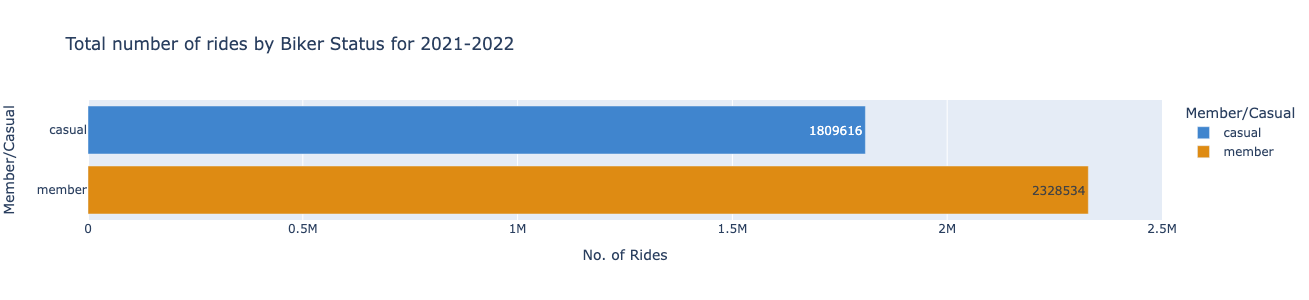

In [61]:
df_2021 = df[df['year'] == 2021]

# Group by 'biker_status' and count the number of rides
fig_2 = df_2021.groupby('biker_status', as_index=False, observed=True).count()


px.bar(fig_2, y='biker_status', x='ride_id', range_x=[0, 2500000],
       color='biker_status', 
       height=300,
       text='ride_id', 
       labels={'ride_id': 'No. of Rides', 'biker_status': 'Member/Casual'},
       hover_name='biker_status', 
       hover_data={'biker_status': False, 'month': False, 'ride_id': True}, 
       color_discrete_map={'casual': '#4085CE', 'member': '#DE8B13'},
       title='Number of Rides by Biker Status for 2021')

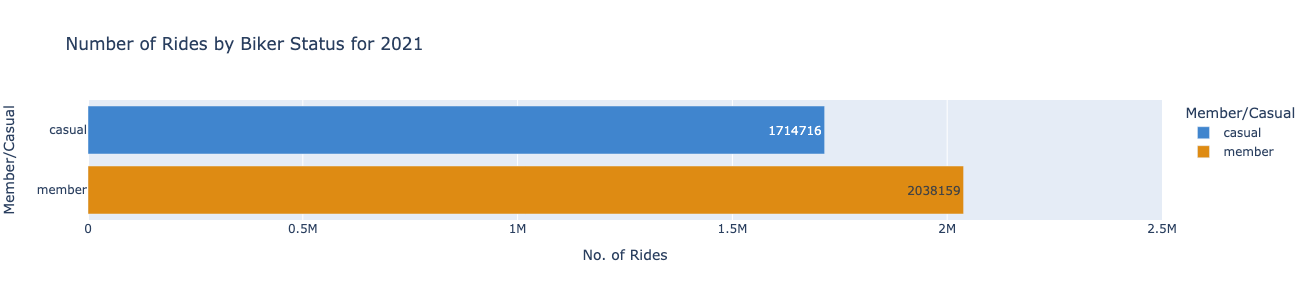

In [62]:
df_2022 = df[df['year'] == 2022]

# Group by 'biker_status' and count the number of rides
fig_3 = df_2022.groupby('biker_status', as_index=False, observed=True).count()


px.bar(fig_3, y='biker_status', x='ride_id', range_x=[0, 350000],
       color='biker_status', 
       height=300,
       text='ride_id',
       labels={'ride_id': 'No. of Rides', 'biker_status': 'Biker Status'},
       hover_name='biker_status', 
       hover_data={'biker_status': False, 'month': False, 'ride_id': True}, 
       color_discrete_map={'casual': '#4085CE', 'member': '#DE8B13'},
       title='Total number of rides by Biker Status for 2022')

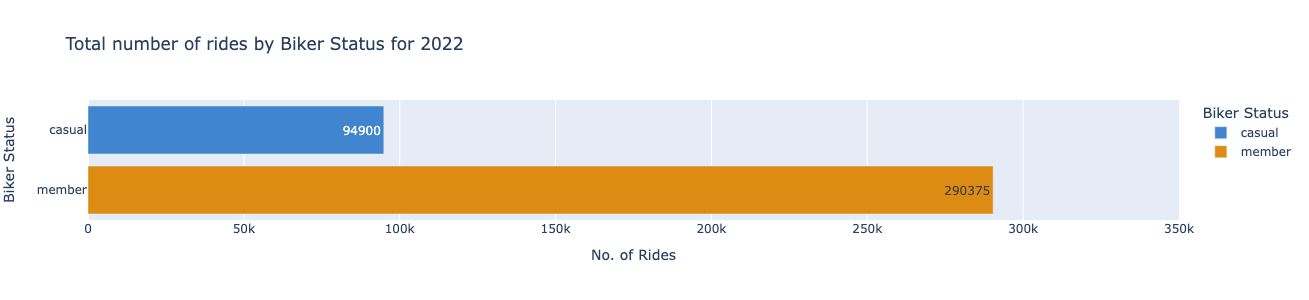

In [63]:
#Check number of rides with different bike types

In [64]:
df['bike_type'].value_counts()

bike_type
classic_bike     2877298
electric_bike     999407
docked_bike       261445
Name: count, dtype: int64

In [65]:
print(df['bike_type'].value_counts(normalize=True) * 100)

bike_type
classic_bike     69.531022
electric_bike    24.151058
docked_bike       6.317920
Name: proportion, dtype: float64


In [66]:
# classic_bike 2,877,298 about 69%
# electric_bike 999,407 about 24%
# docked_bike 261,445 about 6%

In [67]:
px.pie(df, names=df['bike_type'].value_counts().index, 
             values=df['bike_type'].value_counts().values, 
             title='Distribution of Rides by Bike Type')

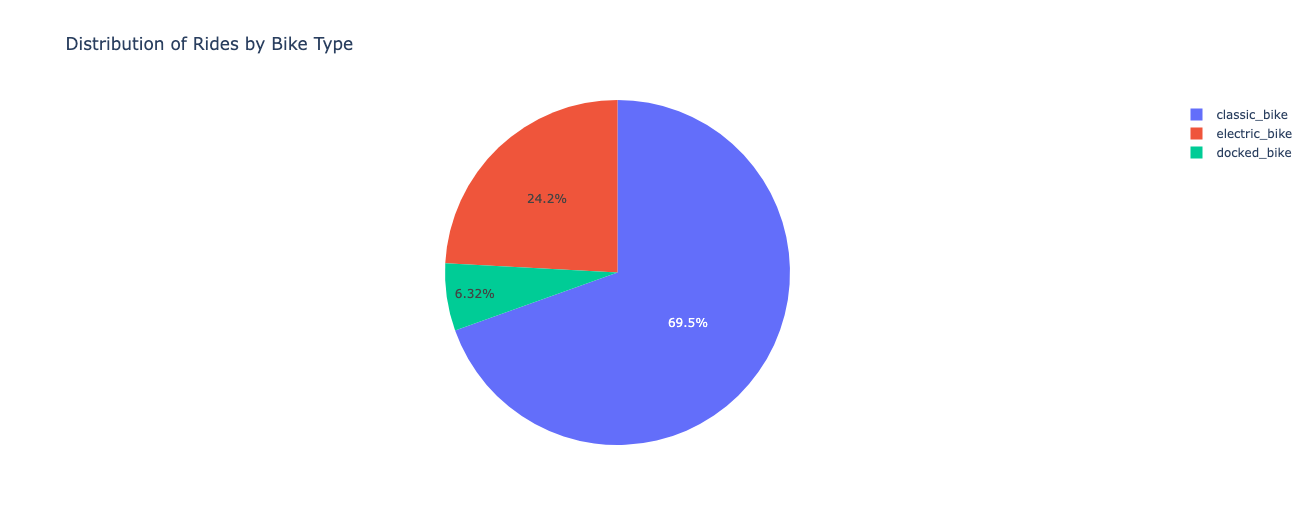

In [68]:
#Check the amount of rides for bike types by  member and casual riders

In [69]:
df[(df['bike_type'].isin(['electric_bike', 'classic_bike', 'docked_bike'])) & 
                 (df['biker_status'].isin(['member', 'casual']))].groupby(['bike_type', 'biker_status'], observed=True).size()

bike_type      biker_status
classic_bike   casual          1106110
               member          1771188
docked_bike    casual           261445
electric_bike  casual           442061
               member           557346
dtype: int64

In [70]:
grouped_counts = df[(df['bike_type'].isin(['electric_bike', 'classic_bike', 'docked_bike'])) & 
                 (df['biker_status'].isin(['member', 'casual']))].groupby(['bike_type', 'biker_status'], observed=True).size()
total_counts = grouped_counts.groupby(level=0, observed=True).sum()

percentages = (grouped_counts / total_counts) * 100

print(percentages)

bike_type      biker_status
classic_bike   casual           38.442664
               member           61.557336
docked_bike    casual          100.000000
electric_bike  casual           44.232330
               member           55.767670
dtype: float64


In [71]:
grouped_counts = df.groupby(['biker_status', 'bike_type'], observed=False).size().reset_index(name='count')

member_df = grouped_counts[grouped_counts['biker_status'] == 'member']
casual_df = grouped_counts[grouped_counts['biker_status'] == 'casual']

colors = {'electric_bike': '#2ca02c', 'classic_bike': '#ff7f0e', 'docked_bike': '#1f77b4'}

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

# Add pie chart for member biker status
fig.add_trace(
    go.Pie(labels=member_df['bike_type'], values=member_df['count'], name='Member Biker Status', marker=dict(colors=[colors[b] for b in member_df['bike_type']])),
    row=1, col=1
)

# Add pie chart for casual biker status
fig.add_trace(
    go.Pie(labels=casual_df['bike_type'], values=casual_df['count'], name='Casual Biker Status', marker=dict(colors=[colors[b] for b in casual_df['bike_type']])),
    row=1, col=2
)

# Update layout with titles and annotations
fig.update_layout(
    title_text="Bike Type Distribution by Biker Status",
    title_x=0.5,  # Center the title
    annotations=[
        dict(text="Member Biker Status", x=0.15, y=1.15, showarrow=False),
        dict(text="Casual Biker Status", x=.85, y=1.15, showarrow=False)
    ],
    height=400, 
    width=1000
)

# Show figure
fig.show()

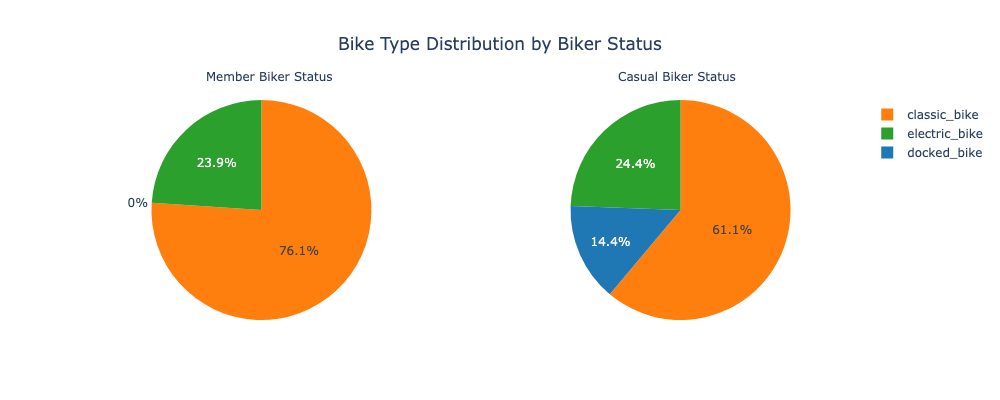

In [72]:
# classic_bike had a total of 2,877,298 rides about 69%
# casual riders : 1,106,110 rides about 38%
# member riders : 1,771,188 rides about 61%
# electric_bike had a total of 999,407 rides about 24%
# casual riders : 442,061 rides about 44%
# member riders : 557,346 rides about 55%
# docked_bike  had a total of 261,445 rides about 6%
# casual riders : 261,445 rides about 100%
# member riders : 0 rides about 0%

In [73]:
# From the above findings
# I can say that:
# member riders maintain the majority of total rides for 2021-2022
# member riders use more electric bikes than casual riders
# Electric bikes are the most popular
# docked bikes are the least popular
# docked bikes are no used by members at all

In [74]:
# Now I will look into key findings for:
# trip lengths for biker status
# avg ride length for member and casual riders and also by bike type
# riders per months
# count if rides
# type of biker status
# type of bike
# avg riders per month by differnt bike type

In [75]:
df.groupby('biker_status', observed=False)['trip_duration'].mean()

biker_status
casual   0 days 00:31:47.449427392
member   0 days 00:12:48.270117163
Name: trip_duration, dtype: timedelta64[ns]

In [76]:
df.groupby('biker_status', observed=False)['trip_duration'].max()

biker_status
casual   38 days 20:24:09
member    1 days 00:55:38
Name: trip_duration, dtype: timedelta64[ns]

In [77]:
fig_4 = df.groupby('biker_status', observed=False)['trip_duration_minutes'].mean().reset_index()

px.bar(fig_4,
       x='trip_duration_minutes', 
       y='biker_status',
       range_x= [0, 50],
       color='biker_status',
       height=300,
       labels={'trip_duration_minutes': 'Average Trip Duration', 'biker_status': 'Member/Casual'},
       hover_name='biker_status',
       hover_data={'biker_status': False, 'trip_duration_minutes': True},
       color_discrete_map={'casual': '#4085CE', 'member': '#DE8B13'},
       title='Average Trip Duration by Biker Status')

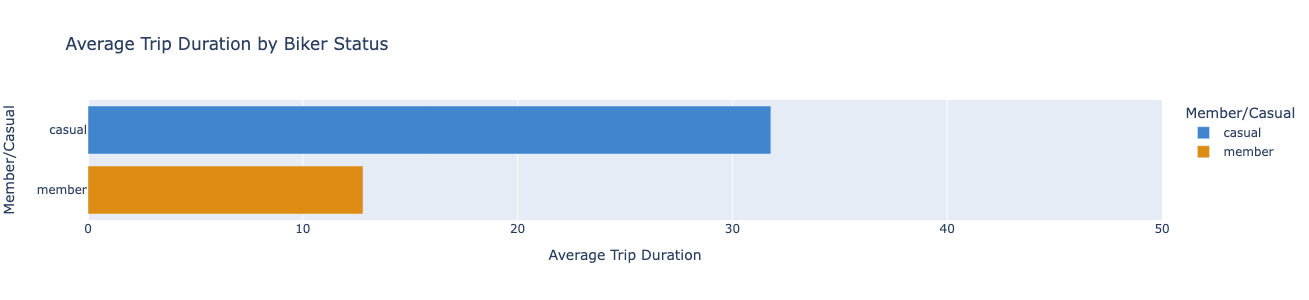

In [78]:
df.groupby(['biker_status', 'bike_type'], observed=False)['trip_duration'].mean()

biker_status  bike_type    
casual        classic_bike    0 days 00:25:41.556935566
              docked_bike     0 days 01:18:23.305307043
              electric_bike   0 days 00:19:29.439975478
member        classic_bike    0 days 00:13:12.853745621
              docked_bike                           NaT
              electric_bike   0 days 00:11:30.145886038
Name: trip_duration, dtype: timedelta64[ns]

In [79]:
fig_5 = df.groupby(['biker_status', 'bike_type'], observed=False)['trip_duration_minutes'].mean().reset_index()

px.bar(fig_5,
        x='biker_status',
        y='trip_duration_minutes',
        color='bike_type',
        barmode='group',
        labels={'trip_duration_minutes': 'Trip Duration Minutes', 'biker_status': 'Casual/Member'},
        title='Avg Trip Duration by Biker Status and Bike Type',
        color_discrete_map=colors)

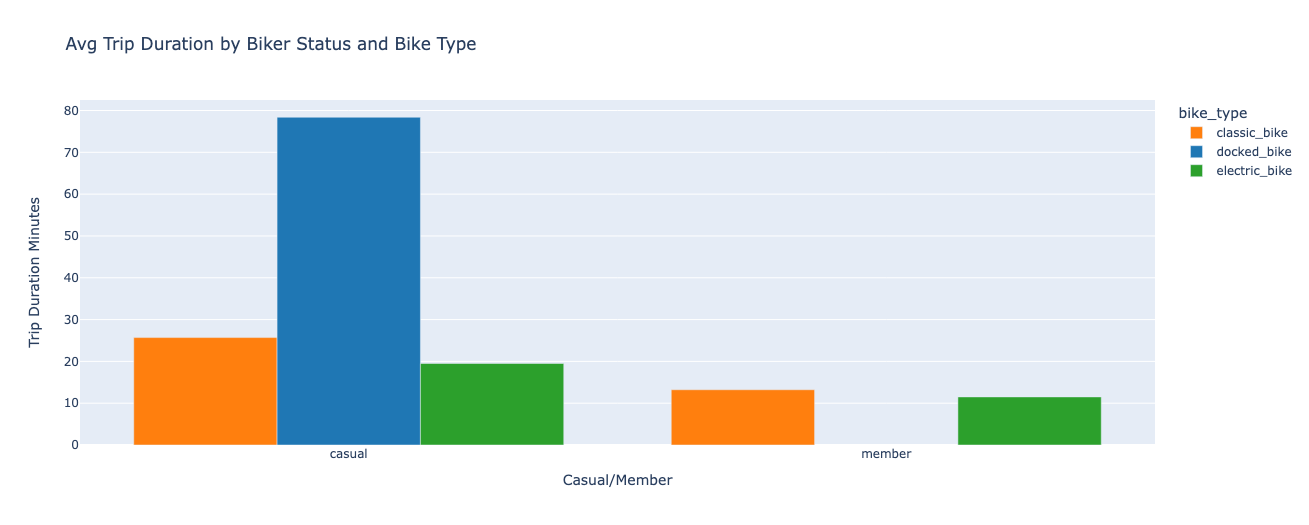

In [80]:
# From the above findings
# I see that:
# casual riders on avg tend to use bikes for longer duration about 31 minutes
# member riders on avg use bikes for shorter duration about 12 minutes
# docked bikes are the prefered bike type for longer duration by casual riders
# member riders do not use docked bikes

In [81]:
# month stats

In [82]:
df['month'].value_counts()

month
9     621135
6     608767
7     597002
8     559243
10    477966
5     450979
11    255904
3     215973
12    176369
2      89174
1      80128
4       5510
Name: count, dtype: int64

In [83]:
df.groupby(['month', 'biker_status'], observed=True).size().reset_index(name='count')

,month,biker_status,count
0,1,casual,12605
1,1,member,67523
2,2,casual,15143
3,2,member,74031
4,3,casual,67152
5,3,member,148821
6,4,casual,2947
7,4,member,2563
8,5,casual,216823
9,5,member,234156


In [84]:
df.groupby(['month', 'biker_status', 'bike_type'], observed=True).size().reset_index(name='count')

,month,biker_status,bike_type,count
0,1,casual,classic_bike,6895
1,1,casual,docked_bike,943
2,1,casual,electric_bike,4767
3,1,member,classic_bike,47802
4,1,member,electric_bike,19721
5,2,casual,classic_bike,8057
6,2,casual,docked_bike,1344
7,2,casual,electric_bike,5742
8,2,member,classic_bike,51163
9,2,member,electric_bike,22868


In [85]:
fig_6 = df[df['year'] == 2021].groupby(['month', 'biker_status'], as_index=False, observed=True).count()

# Sort the DataFrame by month
fig_6 = fig_6.sort_values(by='month')

# Create the line chart
px.line(fig_6, 
        x='month', 
        y='ride_id', 
        range_y=[0, 400000],
        color='biker_status', 
        line_shape='spline',
        markers=True, 
        labels={'ride_id': 'No. of Rides', 'month': 'Months (April - Dec 2021)', 'biker_status': 'Member/Casual'},
        hover_name='biker_status', 
        hover_data={'biker_status': False, 'month': True, 'ride_id': True}, 
        color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

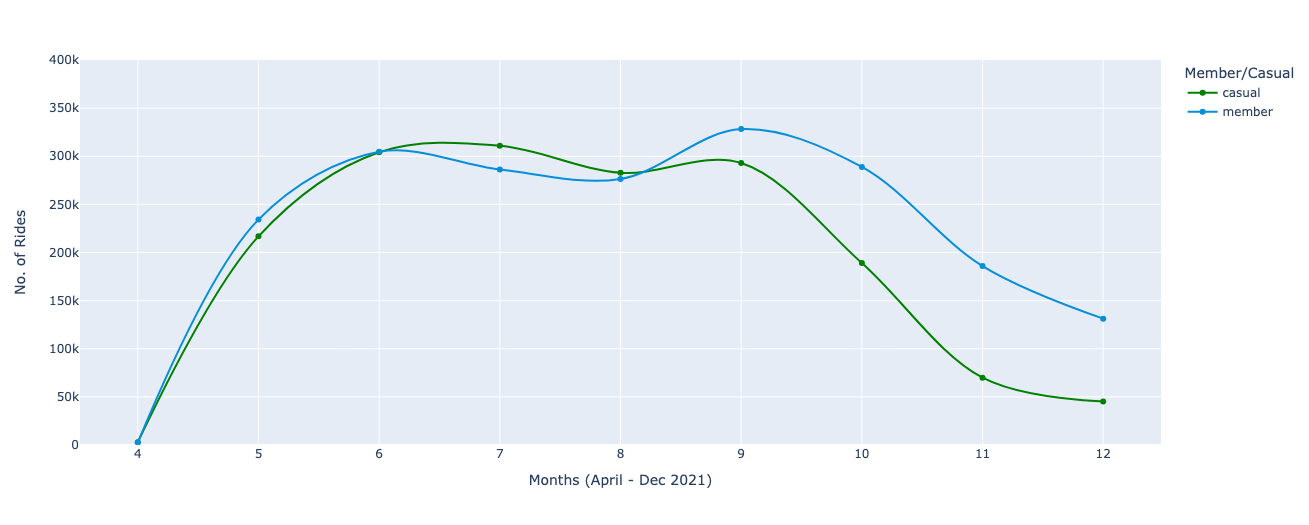

In [86]:
fig_7 = df[df['year'] == 2022].groupby(['month', 'biker_status'], as_index=False, observed=True).count()

# Sort the DataFrame by month
fig_7 = fig_7.sort_values(by='month')

# Create the line chart
fig= px.line(fig_7, 
        x='month', 
        y='ride_id', 
        range_y=[0, 200000],
        color='biker_status', 
        line_shape='spline',
        markers=True, 
        labels={'ride_id': 'No. of Rides', 'month': 'Months (Jan - Mar 2022)', 'biker_status': 'Member/Casual'},
        hover_name='biker_status', 
        hover_data={'biker_status': False, 'month': True, 'ride_id': True}, 
        color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig.update_xaxes(tickvals=[1, 2, 3])

fig.show()

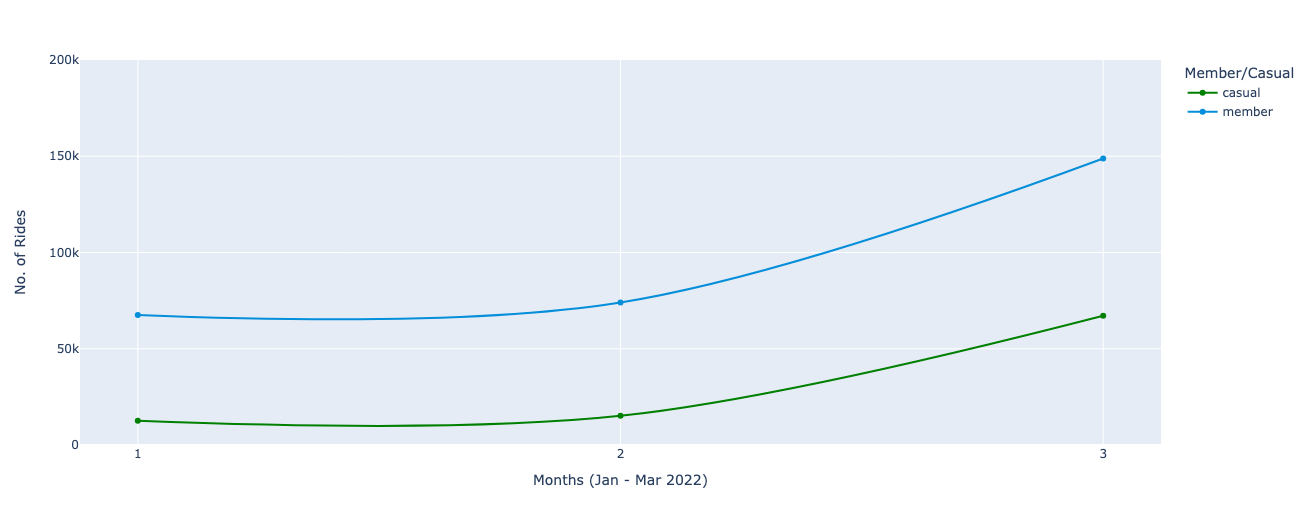

In [87]:
fig_8 = df[df['year'] == 2021].groupby(['month', 'biker_status', 'bike_type'], as_index=False, observed=True).count()
fig_8 = fig_8[fig_8['ride_id'] != 0]

# Sort the DataFrame by month
fig_8 = fig_8.sort_values(by='month')

# Create the line chart with facetting by bike_type
fig = px.line(fig_8, 
        x='month', 
        y='ride_id', 
        range_y=[0, 350000],
        color='biker_status', 
        line_shape='spline',
        markers=True, 
        facet_col='bike_type',  # Facet by bike_type
        labels={'ride_id': 'No. of Rides', 'month': 'Months (Apr - Dec 2021)', 'biker_status': 'Member/Casual'},
        hover_name='biker_status', 
        hover_data={'biker_status': False, 'month': True, 'ride_id': True}, 
        color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig.for_each_annotation(lambda a: a.update(text=" ".join(a.text.split("=")[-1].split("_")).title()))

# Explicitly set the tick values for x-axis
fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)))

fig.show()

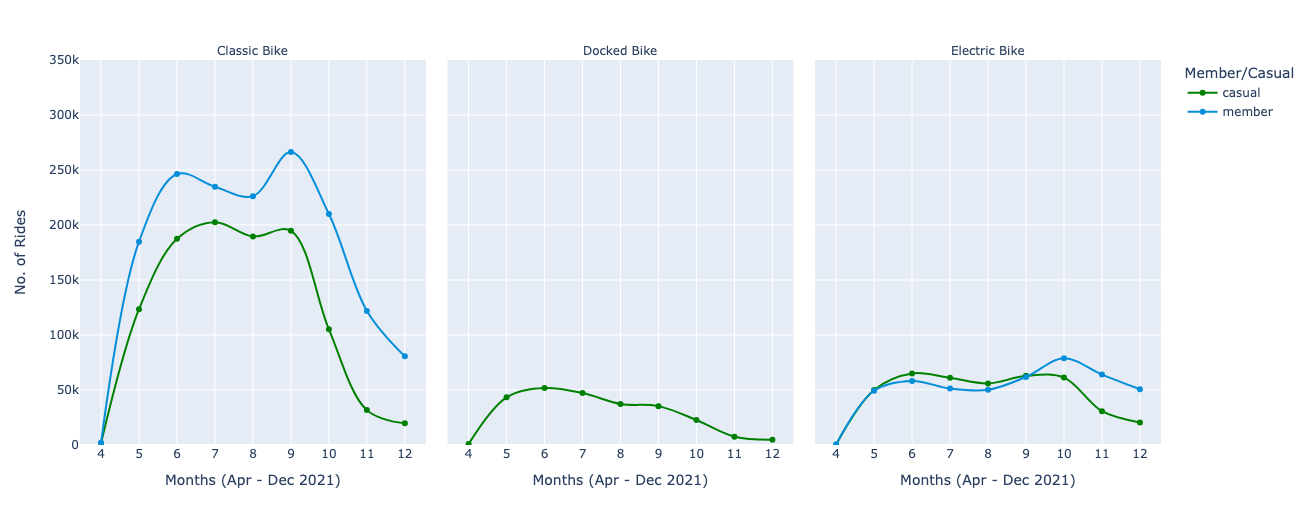

In [88]:
fig_9 = df[df['year'] == 2022].groupby(['month', 'biker_status', 'bike_type'], as_index=False, observed=True).count()
fig_9 = fig_9[fig_9['ride_id'] != 0]

# Sort the DataFrame by month
fig_9 = fig_9.sort_values(by='month')

# Create the line chart with facetting by bike_type
fig = px.line(fig_9, 
        x='month', 
        y='ride_id', 
        range_y=[0, 350000],
        color='biker_status', 
        line_shape='spline',
        markers=True, 
        facet_col='bike_type',  # Facet by bike_type
        labels={'ride_id': 'No. of Rides', 'month': 'Months (Jan - Mar 2022)', 'biker_status': 'Member/Casual'},
        hover_name='biker_status', 
        hover_data={'biker_status': False, 'month': True, 'ride_id': True}, 
        color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig.for_each_annotation(lambda a: a.update(text=" ".join(a.text.split("=")[-1].split("_")).title()))

fig.update_xaxes(tickmode='array', tickvals=[1,2,3])
fig.show()

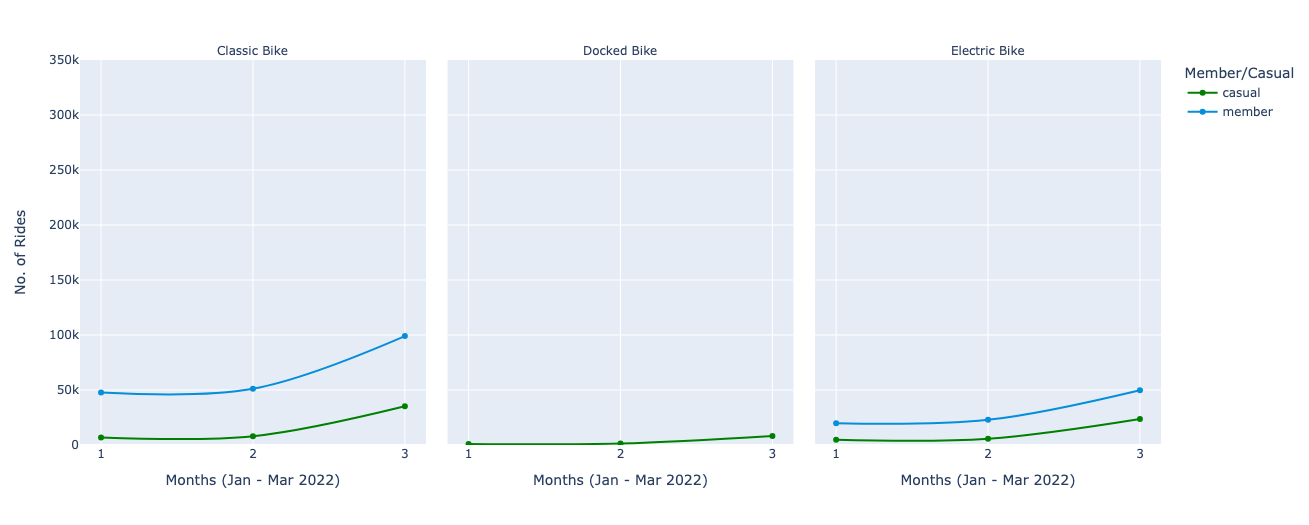

In [89]:
# Group by month and biker_status and calculate the mean trip duration
fig_9_5 = df.groupby(['month', 'biker_status'], observed=True)['trip_duration_minutes'].mean().reset_index()


# Create the bar plot with facetting by biker_status
fig = px.bar(fig_9_5,
             x='month',
             y='trip_duration_minutes',
             color='biker_status',
             barmode='group',
             labels={'trip_duration_minutes': 'Avg Trip Duration (minutes)', 'month': 'Months'},
             title='Average Trip Duration per Month by Biker Status',
             color_discrete_sequence=['#008000', '#058ED9'])  # Define color for each biker_status

# Update x-axis to show every single month
fig.update_xaxes(tickmode='linear', dtick=1)

# Show the plot
fig.show()


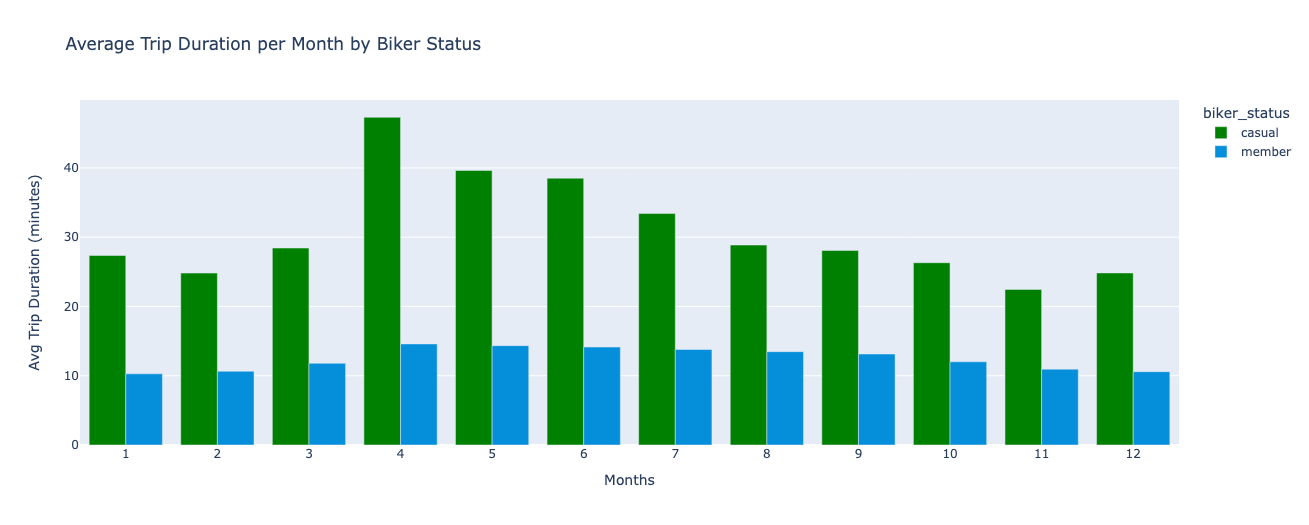

In [90]:
# From the above findings
# I can say that:
# the total number of rides for both member and casual riders rise in the summer and fall in the winter
# casual riders overtake members between june and august (peak summer season)
# casual rider use electric bikes more than member riders for the summer season
# the behavior of casual and member rides tend to be the same as season changes
# avg trip_duration for casual members is around twice as much as member riders
# april had a spike in avg trip duration for casual members 

In [91]:
# Weekday rides

In [92]:
df['day_of_week'].value_counts()

day_of_week
Saturday     720497
Sunday       639200
Wednesday    576930
Friday       573669
Thursday     554132
Tuesday      545599
Monday       528123
Name: count, dtype: int64

In [93]:
df[df['biker_status'] == 'casual'].groupby(['day_of_week', 'biker_status'], observed=True).size().reset_index(name='count').sort_values(by='count')

,day_of_week,biker_status,count
5,Tuesday,casual,184362
6,Wednesday,casual,200144
4,Thursday,casual,204253
1,Monday,casual,204706
0,Friday,casual,251609
3,Sunday,casual,357862
2,Saturday,casual,406680


In [94]:
df[df['biker_status'] == 'member'].groupby(['day_of_week', 'biker_status'], observed=True).size().reset_index(name='count').sort_values(by='count')

,day_of_week,biker_status,count
3,Sunday,member,281338
2,Saturday,member,313817
0,Friday,member,322060
1,Monday,member,323417
4,Thursday,member,349879
5,Tuesday,member,361237
6,Wednesday,member,376786


In [95]:
# casual riders use bikes more on the weekend
# member riders use bikes less on the weekend

In [96]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

fig_10 = df.groupby(['day_of_week', 'biker_status'], observed=True).size().reset_index(name='count')

fig_10 = px.line(fig_10, 
                 x='day_of_week', 
                 y='count', 
                 range_y=[0, 500000],
                 color='biker_status',
                 line_shape='spline',
                 markers=True,
                 labels={'count': 'No. of Rides', 'day_of_week': 'Weekdays', 'biker_status': 'Member/Casual'},
                 hover_name='biker_status',
                 hover_data={'biker_status': False, 'day_of_week': True, 'count': True},
                 color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig_10.show()

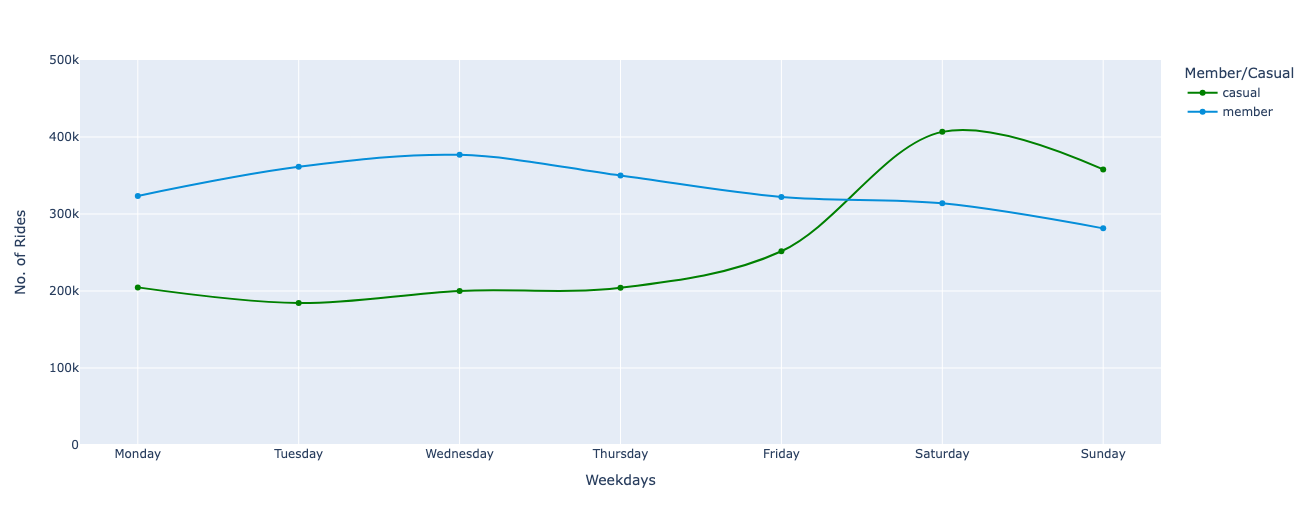

In [97]:
# casual riders use bikes more than member riders over the weekend
# member riders stay constant all through the week with a slight decrease starting the weekend

In [98]:
df[df['biker_status'] == 'member'].groupby(['day_of_week', 'biker_status', 'bike_type'], observed=True).size().reset_index(name='count')

,day_of_week,biker_status,bike_type,count
0,Monday,member,classic_bike,245101
1,Monday,member,electric_bike,78316
2,Tuesday,member,classic_bike,269078
3,Tuesday,member,electric_bike,92159
4,Wednesday,member,classic_bike,283637
5,Wednesday,member,electric_bike,93149
6,Thursday,member,classic_bike,262708
7,Thursday,member,electric_bike,87171
8,Friday,member,classic_bike,241792
9,Friday,member,electric_bike,80268


In [99]:
df[df['biker_status'] == 'casual'].groupby(['day_of_week', 'biker_status', 'bike_type'], observed=True).size().reset_index(name='count')

,day_of_week,biker_status,bike_type,count
0,Monday,casual,classic_bike,119542
1,Monday,casual,docked_bike,30814
2,Monday,casual,electric_bike,54350
3,Tuesday,casual,classic_bike,105661
4,Tuesday,casual,docked_bike,23290
5,Tuesday,casual,electric_bike,55411
6,Wednesday,casual,classic_bike,118919
7,Wednesday,casual,docked_bike,23832
8,Wednesday,casual,electric_bike,57393
9,Thursday,casual,classic_bike,123268


In [100]:
# Group by day_of_week, biker_status, bike_type, count the occurrences, and reset index
fig_11 = df.groupby(['day_of_week', 'biker_status', 'bike_type'], observed=True).size().reset_index(name='count')

# Create the line chart with facetting by bike_type
fig_11 = px.line(fig_11, 
                 x='day_of_week', 
                 y='count', 
                 range_y=[0, 350000],
                 color='biker_status', 
                 line_shape='spline',
                 markers=True, 
                 facet_col='bike_type',  # Facet by bike_type
                 labels={'count': 'No. of Rides', 'day_of_week': 'Day of the Week', 'biker_status': 'Member/Casual'},
                 hover_name='biker_status', 
                 hover_data={'biker_status': False, 'day_of_week': True, 'count': True}, 
                 color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig_11.for_each_annotation(lambda a: a.update(text=" ".join(a.text.split("=")[-1].split("_")).title()))

# Show the figure
fig_11.show()

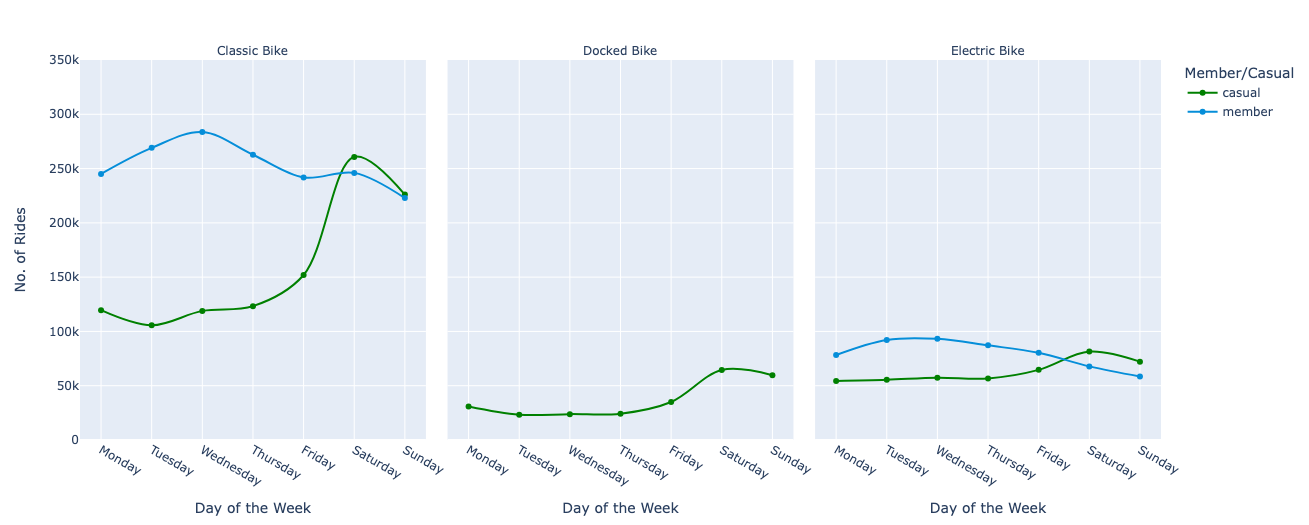

In [101]:
# Group by month and biker_status and calculate the mean trip duration
fig_11_5 = df.groupby(['day_of_week', 'biker_status'], observed=True)['trip_duration_minutes'].mean().reset_index()


# Create the bar plot with facetting by biker_status
fig = px.bar(fig_11_5,
             x='day_of_week',
             y='trip_duration_minutes',
             color='biker_status',
             barmode='group',
             labels={'trip_duration_minutes': 'Avg Trip Duration (minutes)', 'Day_of_week': 'Weekday'},
             title='Average Trip Duration per Day by Biker Status',
             color_discrete_sequence=['#008000', '#058ED9'])  # Define color for each biker_status

# Update x-axis to show every single month
fig.update_xaxes(tickmode='linear', dtick=1)

# Show the plot
fig.show()


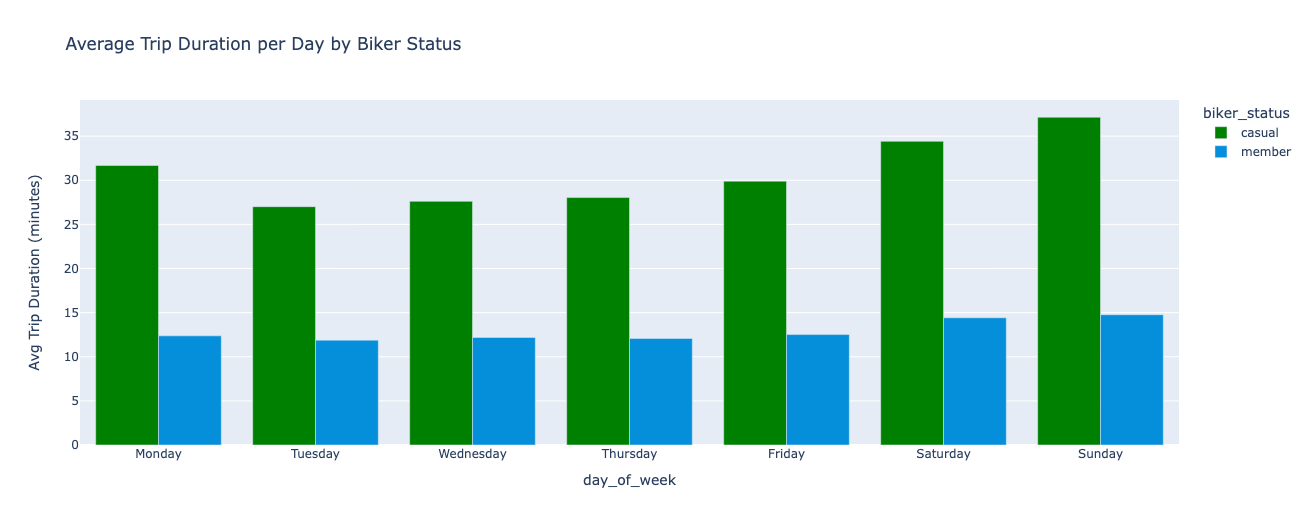![Graph 14]

In [102]:
# classic bikes are used way more during the weekend by both members and casual riders
# docked and electric bikes have a very similar  behavior by casual riders 

In [103]:
# Number of rides each hour

In [104]:
df['hour'].value_counts()

hour
17    422587
18    360383
16    347478
15    283243
19    264910
14    253830
13    252017
12    247715
11    213021
8     189791
20    185347
10    171303
7     156684
9     155288
21    146731
22    123858
23     90068
6      84185
0      61223
1      43154
5      32488
2      26800
3      14380
4      11666
Name: count, dtype: int64

In [105]:
# number of rides are the highest during working hours

In [106]:
df['hour'].value_counts().head(12)

hour
17    422587
18    360383
16    347478
15    283243
19    264910
14    253830
13    252017
12    247715
11    213021
8     189791
20    185347
10    171303
Name: count, dtype: int64

In [107]:
df[df['biker_status'] == 'member'].groupby(['hour', 'biker_status'], observed=True).size().reset_index(name='count')

,hour,biker_status,count
0,0,member,23294
1,1,member,15290
2,2,member,8639
3,3,member,4887
4,4,member,5607
5,5,member,24296
6,6,member,66382
7,7,member,123249
8,8,member,144151
9,9,member,100610


In [108]:
df[df['biker_status'] == 'casual'].groupby(['hour', 'biker_status'], observed=True).size().reset_index(name='count')

,hour,biker_status,count
0,0,casual,37929
1,1,casual,27864
2,2,casual,18161
3,3,casual,9493
4,4,casual,6059
5,5,casual,8192
6,6,casual,17803
7,7,casual,33435
8,8,casual,45640
9,9,casual,54678


In [109]:
fig_12 = df.groupby(['hour', 'biker_status'], observed=True).size().reset_index(name='count')

fig = px.line(fig_12,
        x='hour',
        y='count',
        color='biker_status',
        line_shape='spline',
        markers=True,
        labels={'count': 'No. of Rides', 'hour': '24 Hours', 'biker_status': 'Member/Casual'},
        hover_name='biker_status',
        hover_data={'biker_status': False, 'hour': True, 'count': True},
        color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig.update_xaxes(tickmode='array', tickvals=list(range(24)))
fig.show()

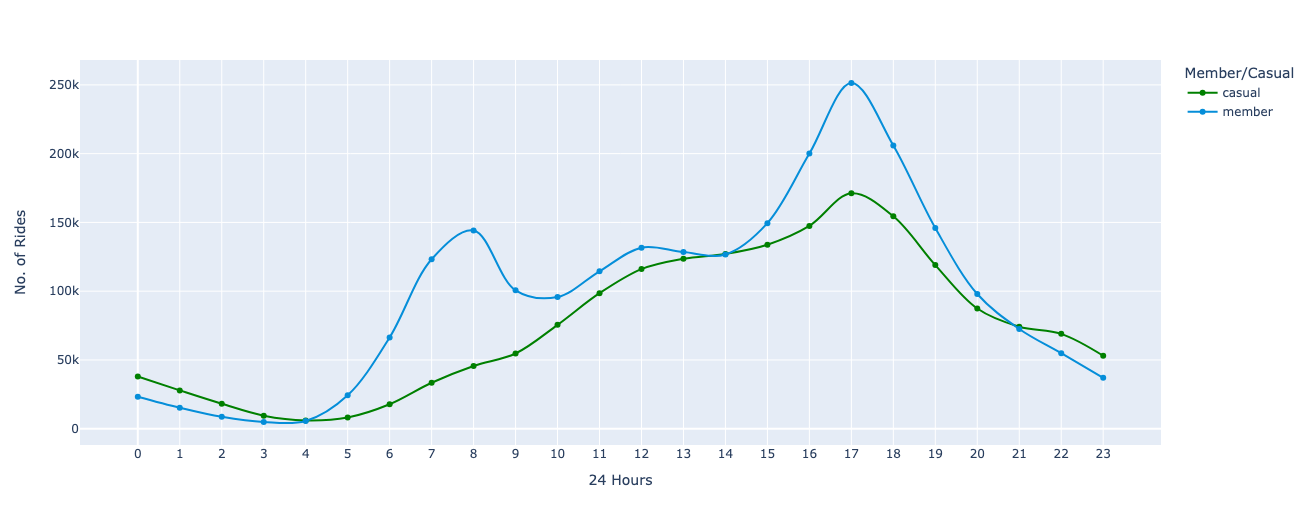

In [110]:
fig_13 = df.groupby(['hour', 'biker_status', 'bike_type'], observed=True).size().reset_index(name='count')

# Create the line chart with facetting by bike_type
fig_13 = px.line(fig_13, 
                 x='hour', 
                 y='count', 
                 range_y=[0, 200000],
                 color='biker_status', 
                 line_shape='spline',
                 markers=True, 
                 facet_col='bike_type',  # Facet by bike_type
                 labels={'count': 'No. of Rides', 'hour': '24 Hours', 'biker_status': 'Member/Casual'},
                 hover_name='biker_status', 
                 hover_data={'biker_status': False, 'hour': True, 'count': True}, 
                 color_discrete_map={'casual': '#008000', 'member': '#058ED9'})

fig_13.for_each_annotation(lambda a: a.update(text=" ".join(a.text.split("=")[-1].split("_")).title()))

fig_13.update_xaxes(tickmode='array', tickvals=list(range(0, 24, 3)), tickangle=45)


fig_13.show()

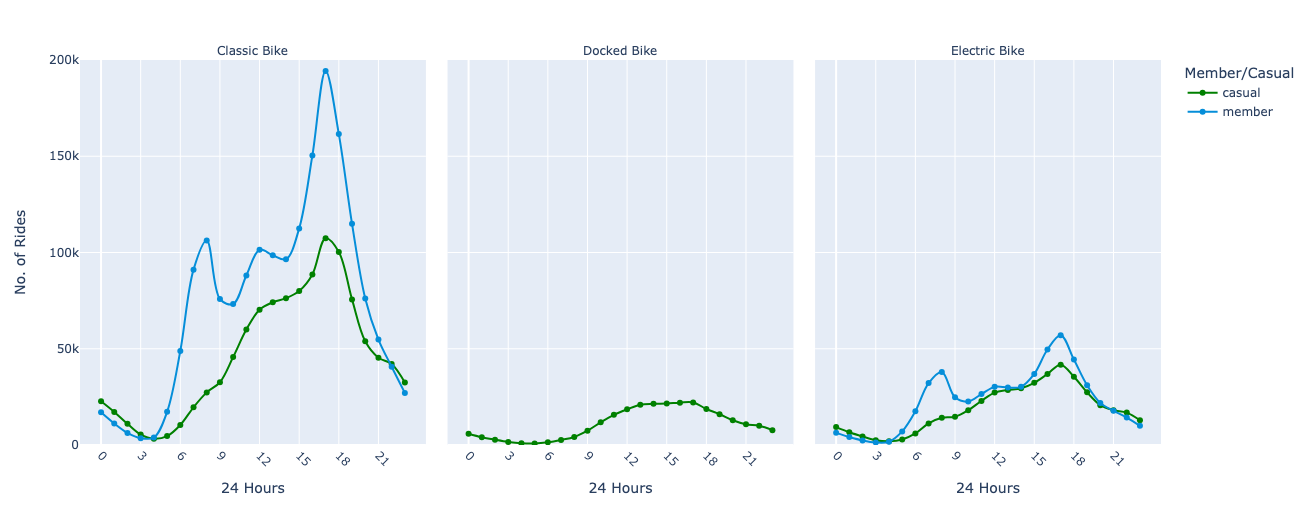

In [111]:
# member riders use bikes more during the day (working hours)
# casual riders overtake member riders in the late hours of the night 
# classic bikes maintain the most usage
# with spike at 7-8am and 4-6pm which can be when member go into work and get off work
# electric and classic bikes maintain similar behavior 

# Act
## Conclusion
- mebers and casual riders use bikes differently
- usage for bikes by casual riders spike in april (spring) and are higher during summer. This shows again that casuals ride for leisure
- avg ride length of casual riders is more than double as of members
- the difference in ride length for the the weekday, hours shows that casual members use bikes for leisure
- while member rides are higher during working hours
- casual riders are high in the late and very early hours of the day
- the number of member rides peak between 7-8 am and then again between 4-6 which is when work hours start and end
- while casual rides gradually inscrease from 5am to 5pm
- classic bikes remain the most popular bike type by both casual and member riders
- cuasual riders use electric and docked bikes more than member riders
- member riders do not use docked bikes at all
## Recommendations 
1. seasonality : Spring and Summer
- the increase in casual riders during the spring and summer is great opportunity for creating targetted campaigns and promotions
- launch campaigns before spring to let casual riders know of the promotions such as :
- sign up discounts for annual member ships
- link spring and summer riders with great weather, festivals, parks and other events
- partner with spring and summer events to promote ride promotions
- include a count down to create a sense of urgency to become a member to enjoy such perks

2. Daily usage: Increase during the weekend
- casual rides overtake member riders during the weekend
- create marketting campaigns and member packages tailored to weekend activities
- discount on weekends for member sign up and also referal bonuses from newly converted members
- partner up with weekend events such as pop up shops, park activities, museums and more

3. Bike type usage: docked bikes and electrics bikes
- casual riders use docked bikes, members do not
- create some type of campaign or promotion package specifically for docked bikes where a certain number of rides will convert you to a member rider at a dicounted price only for a certain amount of time or season
- electric bike usage is higher for casual riders during the summer
- this makes sense because it is hot during the summer and casual riders want to take advantage of the electric bike benefit
- create and target casual riders and offer some kind of promotion or bonus for electric bikes
- create campaigns that relate how great and practical electric bikes are during the summer season